# TS Slicing, Interpolations & Joins

Any data are Time Series when they are ingested. One of the major problem is when it comes to cleaning. Most of TS models need to have equally sliced data and not a lot of software propose an easy way to slice a timestamp.

Beyond that problem, missing values can distort predictions. Filling TS gaps is very important and it needs interpolation techniques.

VerticaPy gives you the possibility to easily slice and interpolate on TS data. Let's use the Smart Meter dataset to demonstrate this powerful functionality.

In [2]:
from verticapy import *

In [3]:
new_auto_connection({"host": "34.237.154.116", 
                     "port": "5433", 
                     "database": "testdrive", 
                     "password": "password", 
                     "user": "dbadmin"},
                    name = "VerticaDSN")
# Set the primary auto-connection
change_auto_connection("VerticaDSN")

In [ ]:
from verticapy import read_csv
read_csv('sm_consumption.csv', schema = 'public', table_name = 'sm_consumption', sep = ',')
read_csv('sm_weather.csv', schema = 'public', table_name = 'sm_weather', sep = ',')
read_csv('sm_meters.csv', schema = 'public', table_name = 'sm_meters', sep = ',')

,123meterIDInt,📅dateUTCTimestamp,"123valueNumeric(10,6)"
1,0,2014-01-12 07:45:00,0.091
2,0,2014-01-14 13:00:00,0.099
3,0,2014-01-16 19:30:00,1.422
4,0,2014-02-08 03:45:00,0.043
5,0,2014-02-11 02:30:00,0.087
6,0,2014-02-11 05:30:00,0.039
7,0,2014-02-21 13:15:00,0.571
8,0,2014-02-23 14:45:00,0.75
9,0,2014-03-07 14:30:00,0.317
10,0,2014-03-11 10:00:00,0.023

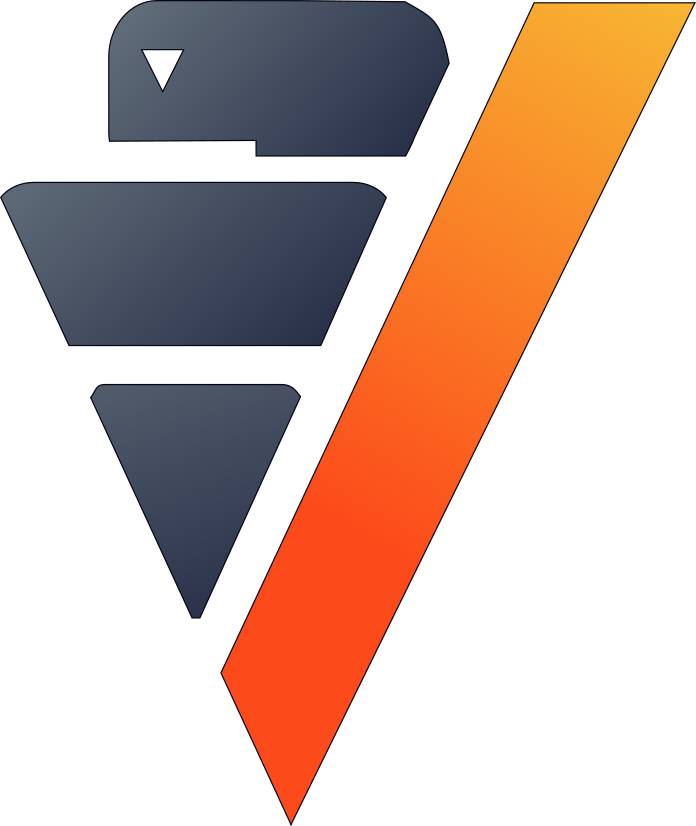

In [4]:
from verticapy import *
sm_consumption = vDataFrame("sm_consumption")
display(sm_consumption)

,count,mean,std,min,25%,50%,75%,max,unique
"""meterID""",1188432,499.853432085306,288.60245384597,0.0,250.0,500.0,750.0,999.0,1000.0
"""value""",1188412,0.334715898585675,0.672138021272073,0.0,0.071003807106599,0.151002409090909,0.356002965599051,34.724,9588.0

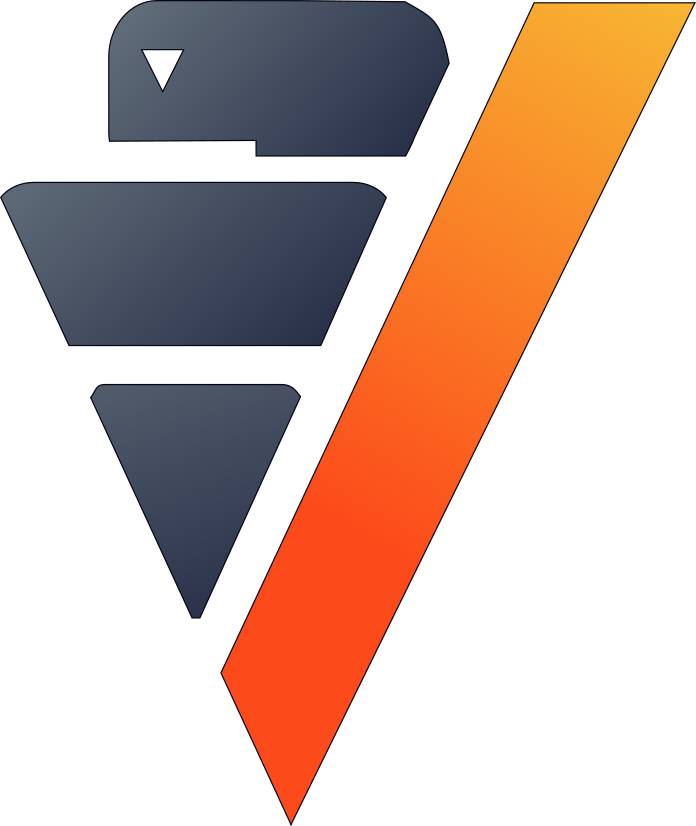

In [5]:
sm_consumption.describe()

We can clearly see many gaps.

Let's slice and interpolate the energy consumption each 30 minutes.

,📅dateUTCTimestamp,123meterIDInt,123valueFloat
1,2014-01-01 11:00:00,0,0.029
2,2014-01-01 11:30:00,0,0.0740909090909091
3,2014-01-01 12:00:00,0,0.119181818181818
4,2014-01-01 12:30:00,0,0.164272727272727
5,2014-01-01 13:00:00,0,0.209363636363636
6,2014-01-01 13:30:00,0,0.254454545454545
7,2014-01-01 14:00:00,0,0.27752380952381
8,2014-01-01 14:30:00,0,0.278571428571429
9,2014-01-01 15:00:00,0,0.279619047619048
10,2014-01-01 15:30:00,0,0.280666666666667

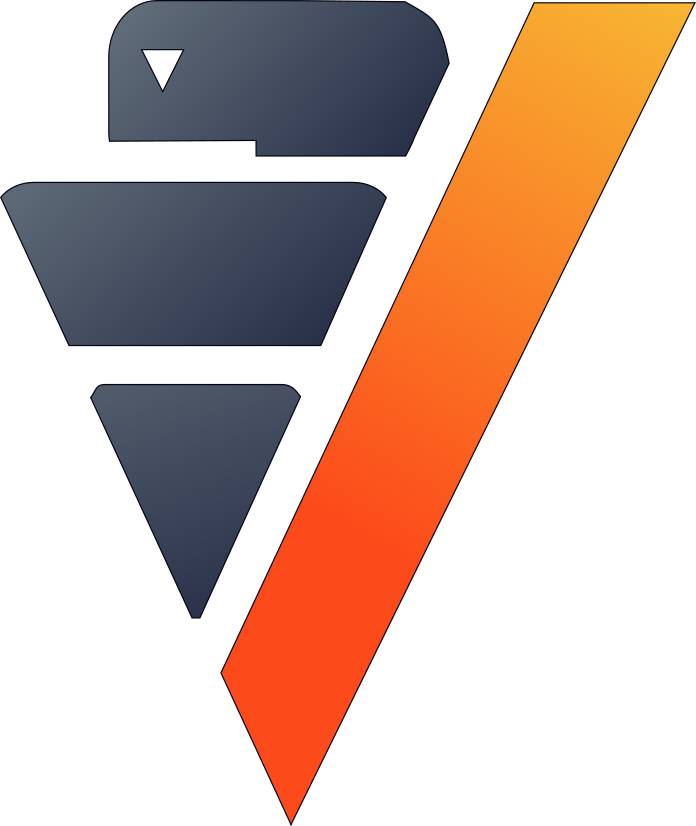

In [6]:
interpolate = sm_consumption.asfreq(ts = "dateUTC",
                                    rule = "30 minutes",
                                    method = {"value": "linear"},
                                    by = ["meterID"])
display(interpolate)

In VerticaPy, slicing and interpolating are very easy to achieve. It is thanks to Vertica built-in functionnalities. Indeed, the Vertica TIMESERIES clause will be used during the computation.

In [7]:
print(interpolate.current_relation())

(
   SELECT
     "dateUTC",
     "meterID",
     "value" 
   FROM
 (
   SELECT
     slice_time AS "dateUTC",
     "meterID",
     TS_FIRST_VALUE("value", 'linear') AS "value" 
   FROM
 "public"."sm_consumption" TIMESERIES slice_time AS '30 minutes' OVER (PARTITION BY "meterID" ORDER BY "dateUTC"::timestamp)) asfreq) 
VERTICAPY_SUBTABLE


Having sliced data on regular interval of time can be important to easily join other data sources. Let's consider the 'weather' dataset which can be joined to the 'smart_meters_consumption' dataset on the date.

,📅dateUTCTimestamp,"123temperatureNumeric(10,6)","123humidityNumeric(11,6)"
1,2014-01-01 03:00:00,39.2,93.0
2,2014-01-01 07:00:00,37.4,93.0
3,2014-01-01 13:30:00,39.2,87.0
4,2014-01-01 19:00:00,35.6,87.0
5,2014-01-01 20:30:00,39.2,87.0
6,2014-01-01 22:30:00,39.2,87.0
7,2014-01-01 23:00:00,39.2,87.0
8,2014-01-02 00:00:00,38.0,76.0
9,2014-01-02 02:00:00,37.4,81.0
10,2014-01-02 03:00:00,37.4,81.0

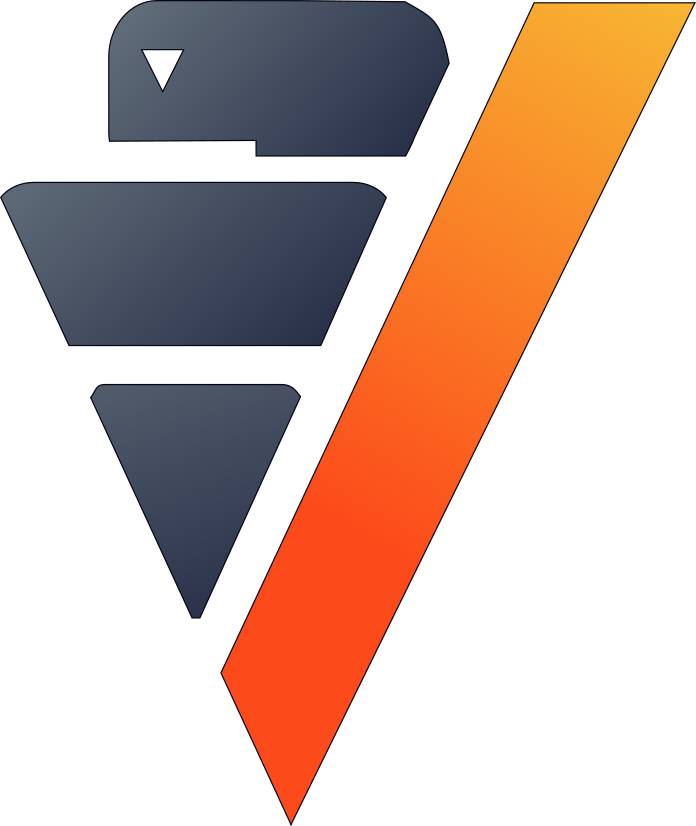

In [8]:
sm_weather = vDataFrame("sm_weather")
display(sm_weather)

We can notice that the data were ingested at regular time interval (30 minutes). We can then easily join the data using as key the 'dateUTC'.

,📅dateUTCTimestamp,123meterIDInt,123valueFloat,"123temperatureNumeric(10,6)","123humidityNumeric(11,6)"
1,2014-03-10 21:00:00,1,1.001,44.6,87.0
2,2014-03-10 21:30:00,1,0.974161290322581,44.6,87.0
3,2014-03-10 22:00:00,1,0.947322580645161,44.6,87.0
4,2014-03-10 22:30:00,1,0.920483870967742,44.6,87.0
5,2014-03-10 23:00:00,1,0.893645161290322,44.6,87.0
6,2014-03-10 23:30:00,1,0.866806451612903,44.6,87.0
7,2014-03-11 00:00:00,1,0.839967741935484,45.0,85.0
8,2014-03-11 00:30:00,1,0.813129032258064,44.6,93.0
9,2014-03-11 01:00:00,1,0.786290322580645,44.6,93.0
10,2014-03-11 01:30:00,1,0.759451612903226,44.6,93.0

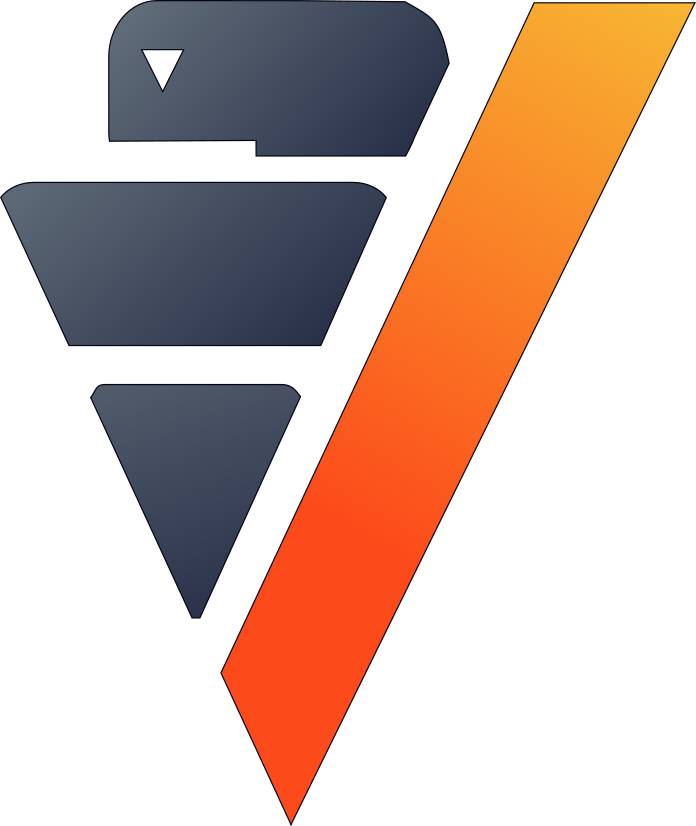

In [9]:
interpolate.join(sm_weather,
                 how = "left",
                 on = {"dateUTC": "dateUTC"},
                 expr2 = ["temperature", "humidity"])

We enriched our dataset.

However, TS slicing/interpolating & Joins can be very expensive. VerticaPy proposes also joins based on interpolation. This technique is very powerful. Vertica will find the closest TS to our key and merge the two records.

,123meterIDInt,📅dateUTCTimestamp,"123valueNumeric(10,6)","123temperatureNumeric(10,6)","123humidityNumeric(11,6)"
1,913,2014-01-01 00:00:00,0.097,38.0,95.0
2,895,2014-01-01 00:00:00,0.184,38.0,95.0
3,795,2014-01-01 00:00:00,0.093,38.0,95.0
4,780,2014-01-01 00:00:00,0.116,38.0,95.0
5,747,2014-01-01 00:00:00,0.559,38.0,95.0
6,660,2014-01-01 00:00:00,0.836,38.0,95.0
7,640,2014-01-01 00:00:00,1.796,38.0,95.0
8,605,2014-01-01 00:00:00,0.038,38.0,95.0
9,484,2014-01-01 00:00:00,0.211,38.0,95.0
10,474,2014-01-01 00:00:00,0.313,38.0,95.0

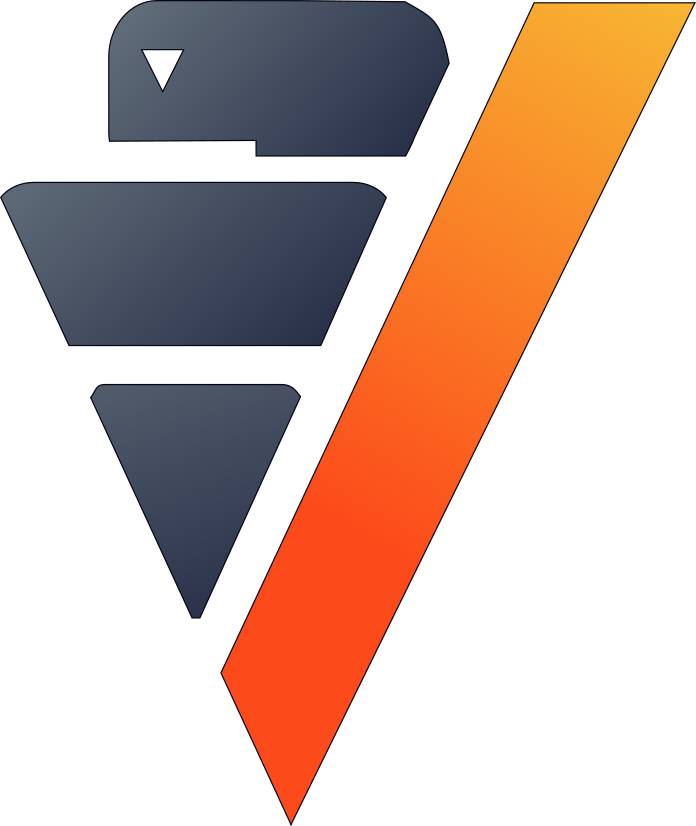

In [10]:
sm_consumption.join(sm_weather,
                    how = "left",
                    on_interpolate = {"dateUTC": "dateUTC"},
                    expr2 = ["temperature", "humidity"])

The easiness resides on the Vertica built-in clauses.

In [11]:
print(sm_consumption.join(sm_weather,
                          how = "left",
                          on_interpolate = {"dateUTC": "dateUTC"},
                          expr2 = ["temperature", "humidity"]).current_relation())

(
   SELECT
     "meterID",
     "dateUTC",
     "value",
     "temperature",
     "humidity" 
   FROM
 (
   SELECT
     x.*,
     y.temperature,
     y.humidity 
   FROM
 "public"."sm_consumption" AS x LEFT JOIN "public"."sm_weather" AS y  ON x."dateUTC" INTERPOLATE PREVIOUS VALUE y."dateUTC") 
VERTICAPY_SUBTABLE) 
VERTICAPY_SUBTABLE


Vertica offers many possibilities for cleaning TS data. Many models are also available to do dynamic forecast.

In [12]:
from verticapy.learn.cluster import KMeans
model = KMeans("KMeans_sm3", n_cluster = 6)

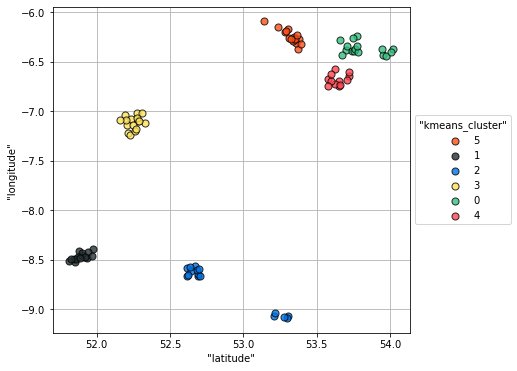

In [13]:
model.fit("sm_meters", ["latitude", "longitude"])
model.plot()

,value
,1191.7642
,1209.2077
,17.443542
,0.9855744385352493
,✅

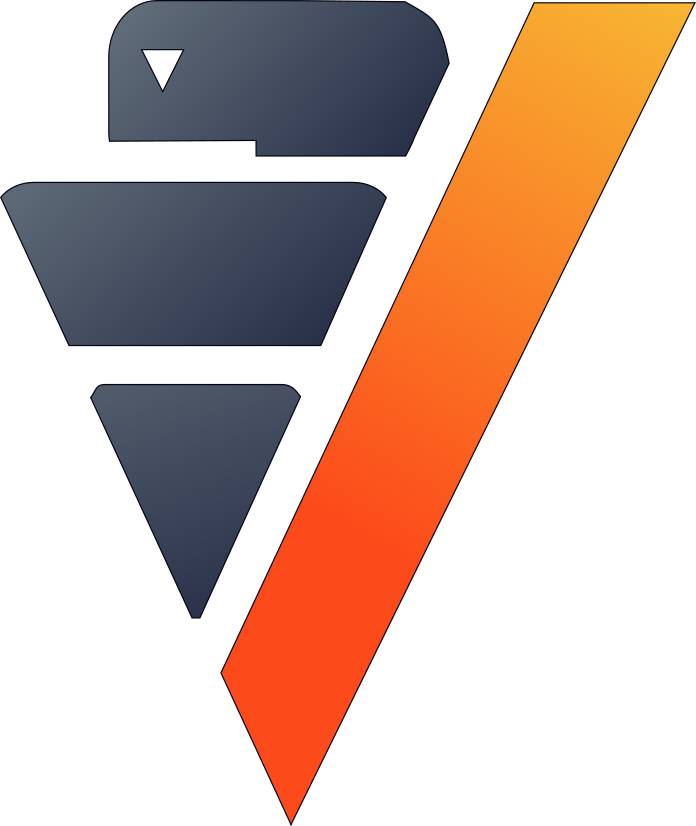

In [14]:
model.metrics_

Sum of squares...

Internal cohesion : External Seperation

Closer to 1 is better

In [15]:
model.to_sql()

'CASE WHEN "latitude" IS NULL OR "longitude" IS NULL THEN NULL WHEN SQRT(POWER("latitude" - 53.3486985900542, 2) + POWER("longitude" - -6.25518579273629, 2)) <= SQRT(POWER("latitude" - 53.815017193644, 2) + POWER("longitude" - -6.37020828202355, 2)) AND SQRT(POWER("latitude" - 53.3486985900542, 2) + POWER("longitude" - -6.25518579273629, 2)) <= SQRT(POWER("latitude" - 51.902163325732, 2) + POWER("longitude" - -8.48640780886406, 2)) AND SQRT(POWER("latitude" - 53.3486985900542, 2) + POWER("longitude" - -6.25518579273629, 2)) <= SQRT(POWER("latitude" - 52.875370413978, 2) + POWER("longitude" - -8.79155649391745, 2)) AND SQRT(POWER("latitude" - 53.3486985900542, 2) + POWER("longitude" - -6.25518579273629, 2)) <= SQRT(POWER("latitude" - 52.2460984884524, 2) + POWER("longitude" - -7.12407702187168, 2)) AND SQRT(POWER("latitude" - 53.3486985900542, 2) + POWER("longitude" - -6.25518579273629, 2)) <= SQRT(POWER("latitude" - 53.6428644953436, 2) + POWER("longitude" - -6.67619923064282, 2)) THEN

In [16]:
print(model.to_python(return_str = True))

def predict(X):
	import numpy as np
	centroids = np.array([[53.815017193644, -6.37020828202355], [51.902163325732, -8.48640780886406], [52.875370413978, -8.79155649391745], [52.2460984884524, -7.12407702187168], [53.6428644953436, -6.67619923064282], [53.3486985900542, -6.25518579273629]])
	result = []
	for centroid in centroids:
		result += [np.sum((np.array(centroid) - X) ** 2, axis=1) ** (1 / 2)]
	result = np.column_stack(result)
	result = np.argmin(result, axis=1)
	return result



In [17]:
# Getting in-memory predictions
model.to_python()([[53.9,-6.4], [52.3, -7.1]])

array([0, 3], dtype=int32)